In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
##some basic preparation
import pandas as pd
import numpy as np
import os


folder_main=u'F:/京东数据/'
folder_user=folder_main+'JData_User/'
folder_product=folder_main+'JData_product/'
folder_comment=folder_main+'JData_Comment/'
folder_action=folder_main+'JData_Action/'
folder_proc=folder_main+'data processed/'
folder_model=folder_main+'model/'
folder_model1=folder_model+'model1/'


In [20]:
##first show the original user data
os.chdir(folder_user)
user_info=pd.read_csv('JData_User.csv',encoding="gb18030")
user_info.head(2)

,user_id,age,sex,user_lv_cd,user_reg_dt
0,54,-1,2,1,2016/1/26
1,79,36-45岁,2,2,2016/1/27


26-35岁    46525
36-45岁    30828
-1        12803
16-25岁     7999
46-55岁     3407
56岁以上      2048
15岁以下         6
Name: age, dtype: int64


<Container object of 7 artists>

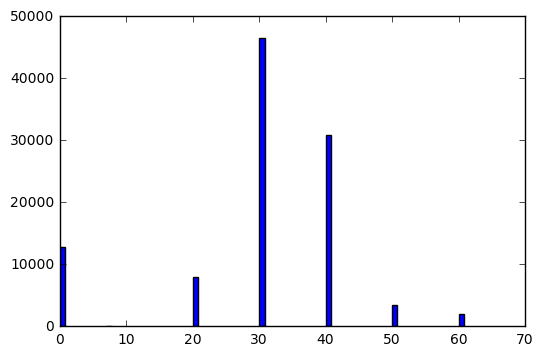

In [8]:

age=user_info['age']
ageCounts=age.value_counts()
print(ageCounts)
#plt.bar(np.arange(len(ageCounts)),ageCounts)
ageDict={'-1':0,u'15岁以下':7,u'16-25岁':20,u'26-35岁':30,u'36-45岁':40,u'46-55岁':50,u'56岁以上':60}
age=age.map(ageDict)
ageCounts=age.value_counts()
#print(ageCounts)
plt.bar(left=ageCounts.keys(),height=ageCounts.values)

5    39875
4    32205
3    21689
2     7519
1     2328
Name: user_lv_cd, dtype: int64


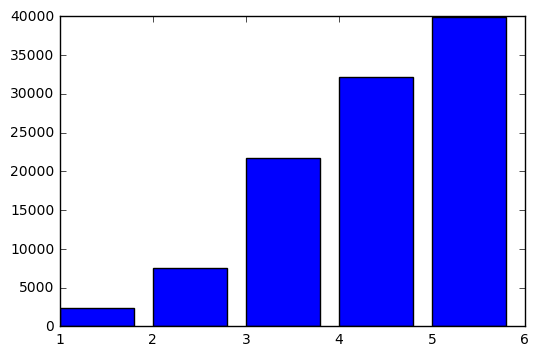

In [9]:
level_info=user_info['user_lv_cd']
levelCounts=level_info.value_counts()
plt.bar(left=levelCounts.keys(),height=levelCounts.values)
print(levelCounts)

2    50484
0    45547
1     7585
Name: sex, dtype: int64


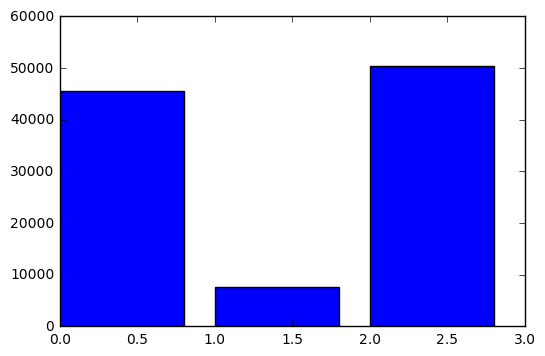

In [10]:
sex_info=user_info['sex']
sexCounts=sex_info.value_counts()
plt.bar(left=sexCounts.keys(),height=sexCounts.values)
print(sexCounts)

In [22]:
os.chdir(folder_product)
product_info=pd.read_csv('JData_product.csv',encoding='gb18030')
product_info.head(2)


,sku_id,attr1,attr2,attr3,cate,brand
0,166731,1,-1,-1,8,545
1,146488,2,2,-1,8,812


In [28]:
cate=product_info['cate']
##no user all same
cateCounts=cate.value_counts()
print('for cate: ')
print(cateCounts)
for i in np.arange(1,4):
    print('----------')
    colname='attr%d' %i
    print('for %s' %colname)
    Attr=product_info[colname]
    AttrCounts=Attr.value_counts()
    print(AttrCounts)

brand=product_info['brand']
brandCounts=brand.value_counts()
print("-------------")
print("the number of brand is ：")
print(len(brandCounts))

for cate: 
8    24187
Name: cate, dtype: int64
----------
for attr1
 3    14144
 1     4760
 2     3582
-1     1701
Name: attr1, dtype: int64
----------
for attr2
 1    13513
 2     6624
-1     4050
Name: attr2, dtype: int64
----------
for attr3
 2    11978
 1     8394
-1     3815
Name: attr3, dtype: int64
-------------
the number of brand is ：
102


In [27]:
##first show the original action data
ActionOrig=pd.read_csv('./data sample/action_data_sample.csv')
ActionOrig.head(2)
##type explanation

,user_id,sku_id,time,model_id,type,cate,brand
0,80850,159187,2016/3/12 0:08,NaN,6,5,225
1,96193,85689,2016/3/12 2:26,NaN,6,8,214


In [36]:
##the basic function for precessing the action data
def getCount(begin_dt,end_dt,SplInfo):
    
    SplInfo1=SplInfo[SplInfo['time']<end_dt]
    SplInfo1=SplInfo1[SplInfo1['time']>begin_dt]
    
    if(len(SplInfo1)>0):
        SplInfo1=SplInfo1.sort_values(by=['user_id','sku_id','type'])
        SplGroup=SplInfo1.groupby(['user_id','sku_id','type'])
        SplCount=SplGroup.apply(len)
        SplCount=SplCount.unstack(level=2)
        SplCount=SplCount.fillna(0)
        return SplCount
    else:
        print('no data')

        
##data presentation
tempDF=pd.read_csv(folder_proc+'Mar5day.csv')
del tempDF['Unnamed: 0']
tempDF.head(2)  
##here the key is (UID,PID) the number of Num1 represent the times that user take the action 1

,Num1,Num2,Num3,Num4,Num5,Num6,UID,PID
0,1.0,0.0,0.0,0.0,0.0,1.0,2,12564
1,1.0,0.0,0.0,0.0,0.0,4.0,2,24371


In [46]:
##time info, the key for this DF is (UID,PID)
FirstDF=pd.read_csv(folder_proc+Mon+time+'FirstDay.csv')
del FirstDF['Unnamed: 0']
FirstDF.head(2)

,1First,2First,3First,4First,5First,6First,UID,PID,firstT
0,28.0,20.0,20.0,20.0,20.0,28.0,2,12564,28.0
1,28.0,20.0,20.0,20.0,20.0,28.0,2,24371,28.0


In [47]:
##time info, the key for this DF is (UID,PID)
LastDF=pd.read_csv(folder_proc+Mon+time+'lastDay.csv')
del LastDF['Unnamed: 0']
LastDF.head(2)

,1Last,2Last,3Last,4Last,5Last,6Last,UID,PID,lastT
0,28.0,20.0,20.0,20.0,20.0,28.0,2,12564,0.0
1,28.0,20.0,20.0,20.0,20.0,28.0,2,24371,0.0


In [48]:
##time info, the key for this DF is (UID,PID)
ActiveDF=pd.read_csv(folder_proc+Mon+time+'ActiveDay.csv')
del ActiveDF['Unnamed: 0']
ActiveDF.head(2)

,UID,PID,day1,day2,day3,day4,day5,day6,InterDays,ItDayR,It2BuyR
0,2,12564,1.0,0.0,0.0,0.0,0.0,1.0,1,0.2,0.0
1,2,24371,1.0,0.0,0.0,0.0,0.0,1.0,1,0.2,0.0


In [41]:
Mon='Mar'
time='5'
## then we need to use the User's action to get the some basic features for user
UFeature=pd.read_csv(folder_proc+Mon+time+'dayUinfo.csv')
UFeature.head(2)

,UID,Num1TU,Num2TU,Num3TU,Num4TU,Num5TU,Num6TU,UIntNum,UInt1,UInt2,...,Num4PU,Num5PU,Num6PU,IntPU,UID.1,1to4UR,2to4UR,3to4UR,5to4UR,6to4UR
0,2,8.0,0.0,0.0,0.0,0.0,12.0,129.0,0.0,0.0,...,0.0,0.0,1.714286,18.428571,2,0.0,NaN,NaN,NaN,0.0
1,6,10.0,0.0,0.0,0.0,0.0,15.0,71.0,0.0,0.0,...,0.0,0.0,3.000000,14.200000,6,0.0,NaN,NaN,NaN,0.0


In [42]:
UFeature.columns
##the explanation for each variables


Index(['UID', 'Num1TU', 'Num2TU', 'Num3TU', 'Num4TU', 'Num5TU', 'Num6TU',
       'UIntNum', 'UInt1', 'UInt2', 'UInt3', 'UClick1', 'UPNum', 'Num1PU',
       'Num2PU', 'Num3PU', 'Num4PU', 'Num5PU', 'Num6PU', 'IntPU', 'UID.1',
       '1to4UR', '2to4UR', '3to4UR', '5to4UR', '6to4UR'],
      dtype='object')

In [43]:
PFeature=pd.read_csv(folder_proc+Mon+time+'dayPinfo.csv')
PFeature.head(2)

,PID,Num1TP,Num2TP,Num3TP,Num4TP,Num5TP,Num6TP,PIntNum,PInt1,PInt2,...,Num6PP,IntPP,activeUR,PID.1,1to4PR,2to4PR,3to4PR,5to4PR,6to4PR,BuyMoreR
0,2,5.0,0.0,0.0,0.0,0.0,9.0,14.0,0.0,0.0,...,3.0,4.666667,0.666667,2,0.0,NaN,NaN,NaN,0.0,NaN
1,23,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,...,1.0,2.000000,0.000000,23,0.0,NaN,NaN,NaN,0.0,NaN


In [44]:
PFeature.columns
##the explanation for each variables

Index(['PID', 'Num1TP', 'Num2TP', 'Num3TP', 'Num4TP', 'Num5TP', 'Num6TP',
       'PIntNum', 'PInt1', 'PInt2', 'PInt3', 'buyUNum', 'PClick1',
       'activeUNum', 'buyMoreNum', 'visitUNum', 'PUNum', 'Num1PP', 'Num2PP',
       'Num3PP', 'Num4PP', 'Num5PP', 'Num6PP', 'IntPP', 'activeUR', 'PID.1',
       '1to4PR', '2to4PR', '3to4PR', '5to4PR', '6to4PR', 'BuyMoreR'],
      dtype='object')

In [30]:
##because the product sample is too big(20000), for each user, we only consider the product that he interact with for 
##last 5 days.
Mon='Mar'
time='5'
TUInfo=pd.read_csv(folder_proc+Mon+time+'XY1.csv')
del TUInfo['Unnamed: 0']
TUInfo.head(2)  
##here the y represent whether the person will buy that specific product ,so the key is (UID,PID)
#tempcol=pd.Series(XYDF.columns)
#tempcol.columns
#print(tempcol[:25])
#print(tempcol[25:50])
#print(tempcol[50:75])
#print(tempcol[75:])


,Num1,Num2,Num3,Num4,Num5,Num6,UID,PID,BuyNum,Y_value,...,N3,N4,N5,N6,NumFebMar1,NumFebMar2,NumFebMar3,NumFebMar4,NumFebMar5,NumFebMar6
0,1.0,0.0,0.0,0.0,0.0,1.0,2,12564,0.0,0,...,0.0,0.0,0.0,6.0,41.0,0.0,0.0,0.0,0.0,80.0
1,1.0,0.0,0.0,0.0,0.0,4.0,2,24371,0.0,0,...,0.0,0.0,0.0,6.0,41.0,0.0,0.0,0.0,0.0,80.0


In [77]:
XDF=TUInfo.copy()
del XDF['BuyNum']
del XDF['Y_value']
del XDF['UID']
del XDF['PID']
YDF=TUInfo[['Y_value']]


In [69]:
for col in XDF.columns:
    tempcov=np.cov(XDF[col],YDF['Y_value'])
    corr=tempcov[0,1]/np.sqrt(tempcov[0,0]*tempcov[1,1])
    if(abs(corr)>0.05):
        appendstr='*************'
    else:
        appendstr=''
    print('%s cor with y is %f  %s' %(col,corr,appendstr)) 

Num1 cor with y is 0.078422  *************
Num2 cor with y is 0.053433  *************
Num3 cor with y is 0.015797  
Num4 cor with y is 0.007613  
Num5 cor with y is 0.052114  *************
Num6 cor with y is 0.072921  *************
Num1TU cor with y is -0.001492  
Num2TU cor with y is 0.010910  
Num3TU cor with y is 0.003298  
Num4TU cor with y is 0.004205  
Num5TU cor with y is 0.003253  
Num6TU cor with y is -0.001105  
UIntNum cor with y is -0.010293  
UInt1 cor with y is -0.004103  
UInt2 cor with y is -0.008933  
UInt3 cor with y is -0.008561  
UClick1 cor with y is -0.005176  
UPNum cor with y is -0.011940  
Num1PU cor with y is 0.019951  
Num2PU cor with y is 0.022812  
Num3PU cor with y is 0.007978  
Num4PU cor with y is 0.006921  
Num5PU cor with y is 0.013040  
Num6PU cor with y is 0.013674  
IntPU cor with y is -0.000154  
1to4UR cor with y is 0.007379  
2to4UR cor with y is 0.003221  
3to4UR cor with y is 0.006671  
5to4UR cor with y is -0.000849  
6to4UR cor with y is 0.00

In [78]:
XDF1=XDF[['Num1','Num2','Num5','Num6','day1','day2','InterDays','2First','2Last']]
cols=['Num1','Num2','Num5','day1','day2','InterDays','2Last']
for i in np.arange(len(cols)):
    for j in np.arange(i+1,len(cols)):
        tempcov=np.cov(XDF1[cols[i]],XDF1[cols[j]])
        corr=tempcov[0,1]/np.sqrt(tempcov[0,0]*tempcov[1,1])
        if(abs(corr)>0.6):
            appendstr='*************'
        else:
            appendstr=''
        print('%s cor with %s is %f  %s' %(cols[i],cols[j],corr,appendstr))
##we can also use the weighted information    
##higher correlation may be caused by the sparsee matrix

Num1 cor with Num2 is 0.373273  
Num1 cor with Num5 is 0.172629  
Num1 cor with day1 is 0.545164  
Num1 cor with day2 is 0.335647  
Num1 cor with InterDays is 0.535784  
Num1 cor with 2Last is 0.295245  
Num2 cor with Num5 is 0.078623  
Num2 cor with day1 is 0.183450  
Num2 cor with day2 is 0.868429  *************
Num2 cor with InterDays is 0.296028  
Num2 cor with 2Last is 0.808282  *************
Num5 cor with day1 is 0.103672  
Num5 cor with day2 is 0.077849  
Num5 cor with InterDays is 0.115489  
Num5 cor with 2Last is 0.073770  
day1 cor with day2 is 0.173482  
day1 cor with InterDays is 0.864635  *************
day1 cor with 2Last is 0.134436  
day2 cor with InterDays is 0.312506  
day2 cor with 2Last is 0.951122  *************
InterDays cor with 2Last is 0.257251  


In [84]:
from sklearn.tree import DecisionTreeClassifier
XYDF=TUInfo[['Num1','Num2','Num5','Num6','day1','day2','InterDays','2First','2Last','sex','age']]   
YSeries=TUInfo[['Y_value']]
#del XYDF['BuyCond']    
#XYDF=TUinfo[['Num1TU','Num2TU','Num6TU','UPNum']]

for maxlen in np.arange(10,35,5):
    print("maxlen is %d:" %maxlen)
    groupNum=7
    NumInGroup=int(len(XYDF)/groupNum)
    ScoreInfo=[]
    totalScore=[]
    for i in np.arange(groupNum):
        if(i==0):
            X_test=XYDF.ix[:NumInGroup]
            X_train=XYDF.ix[NumInGroup:]
            Y_test=YSeries.ix[:NumInGroup]
            Y_train=YSeries.ix[NumInGroup:]
        else:
            X_test=XYDF.ix[(i*NumInGroup):(i+1)*NumInGroup]
            X_train=XYDF.ix[:(i*NumInGroup)]
            X_train=X_train.append(XYDF.ix[(i+1)*NumInGroup:])
            Y_test=YSeries.ix[(i*NumInGroup):(i+1)*NumInGroup]
            Y_train=YSeries.ix[:(i*NumInGroup)]
            Y_train=Y_train.append(YSeries.ix[(i+1)*NumInGroup:])
    
        tree = DecisionTreeClassifier(criterion='entropy', max_depth=maxlen, random_state=0)
        tree.fit(X_train, Y_train)
        y_pred_test = tree.predict(X_test)
        RightNum=sum(y_pred_test*Y_test['Y_value'])
        recallRatio=float(RightNum)/sum(Y_test['Y_value'])
        preRatio=float(RightNum)/sum(y_pred_test)
        total=6*preRatio*recallRatio/(5*recallRatio+preRatio)
        print("preRNum: %d preRatio: %f  recallRatio: %f  total Score: %f" %(RightNum,preRatio,recallRatio,total))
        ScoreInfo.append((preRatio,recallRatio,total))
        totalScore.append(total)
        if(i==(groupNum-1)):
            print("----------------------------/n")
            print("the average score for maxlen %d is %f" %(maxlen,sum(totalScore)/groupNum))
            print("----------------------------/n")

maxlen is 10:
preRNum: 0 preRatio: 0.000000  recallRatio: 0.000000  total Score: nan
preRNum: 1 preRatio: 0.111111  recallRatio: 0.007092  total Score: 0.032258
preRNum: 1 preRatio: 0.066667  recallRatio: 0.006135  total Score: 0.025210
preRNum: 0 preRatio: 0.000000  recallRatio: 0.000000  total Score: nan
preRNum: 1 preRatio: 0.076923  recallRatio: 0.008000  total Score: 0.031579
preRNum: 1 preRatio: 0.111111  recallRatio: 0.005882  total Score: 0.027907
preRNum: 2 preRatio: 0.400000  recallRatio: 0.017857  total Score: 0.087591
----------------------------/n
the average score for maxlen 10 is nan
----------------------------/n
maxlen is 15:
preRNum: 4 preRatio: 0.111111  recallRatio: 0.021277  total Score: 0.065217
preRNum: 2 preRatio: 0.041667  recallRatio: 0.014184  total Score: 0.031496
preRNum: 1 preRatio: 0.017544  recallRatio: 0.006135  total Score: 0.013393
preRNum: 1 preRatio: 0.022222  recallRatio: 0.006329  total Score: 0.015666
preRNum: 3 preRatio: 0.076923  recallRatio: 0

In [31]:
from sklearn.ensemble import RandomForestClassifier

#XYDF=TUInfo.copy()
#del XYDF['Y_value']
#del XYDF['BuyNum']
XYDF=TUInfo[['Num1','Num2','Num5','Num6','day1','day2','InterDays','2First','2Last','sex','age']]   
YSeries=TUInfo[['Y_value']]

groupNum=7
NumInGroup=int(len(XYDF)/groupNum)
ScoreInfo=[]
for j in np.arange(10,35,5):
    print('the num of estimators are: %d '%j)
    ScoreInfo=[]
    for i in np.arange(groupNum):
        if(i==0):
            X_test=XYDF.ix[:NumInGroup]
            X_train=XYDF.ix[NumInGroup:]
            Y_test=YSeries.ix[:NumInGroup]
            Y_train=YSeries.ix[NumInGroup:]
        else:
            X_test=XYDF.ix[(i*NumInGroup):(i+1)*NumInGroup]
            X_train=XYDF.ix[:(i*NumInGroup)]
            X_train=X_train.append(XYDF.ix[(i+1)*NumInGroup:])
            Y_test=YSeries.ix[(i*NumInGroup):(i+1)*NumInGroup]
            Y_train=YSeries.ix[:(i*NumInGroup)]
            Y_train=Y_train.append(YSeries.ix[(i+1)*NumInGroup:])

        forest = RandomForestClassifier(criterion='entropy',
                                        n_estimators=10, 
                                        random_state=1,
                                        n_jobs=2)   
        forest.fit(X_train, Y_train['Y_value'])
        y_pred_test = forest.predict(X_test)
        RightNum=sum(y_pred_test*Y_test['Y_value'])
        recallRatio=float(RightNum)/sum(Y_test['Y_value'])
        preRatio=float(RightNum)/sum(y_pred_test)
        total=6*preRatio*recallRatio/(5*recallRatio+preRatio)
        print("preRNum: %d preRatio: %f  recallRatio: %f  total Score: %f" %(RightNum,preRatio,recallRatio,total))
        ScoreInfo.append((preRatio,recallRatio,total))
        print("average score is %f"%(sum(scoreInfo)/len(scoreInfo)))


the num of estimators are: 10 
preRNum: 0 preRatio: 0.000000  recallRatio: 0.000000  total Score: nan
preRNum: 1 preRatio: 0.083333  recallRatio: 0.007092  total Score: 0.029851
preRNum: 0 preRatio: 0.000000  recallRatio: 0.000000  total Score: nan
preRNum: 2 preRatio: 0.142857  recallRatio: 0.012658  total Score: 0.052632
preRNum: 0 preRatio: 0.000000  recallRatio: 0.000000  total Score: nan
preRNum: 2 preRatio: 0.100000  recallRatio: 0.011765  total Score: 0.044444
preRNum: 1 preRatio: 0.066667  recallRatio: 0.008929  total Score: 0.032086
the num of estimators are: 15 
preRNum: 0 preRatio: 0.000000  recallRatio: 0.000000  total Score: nan
preRNum: 1 preRatio: 0.083333  recallRatio: 0.007092  total Score: 0.029851
preRNum: 0 preRatio: 0.000000  recallRatio: 0.000000  total Score: nan
preRNum: 2 preRatio: 0.142857  recallRatio: 0.012658  total Score: 0.052632
preRNum: 0 preRatio: 0.000000  recallRatio: 0.000000  total Score: nan
preRNum: 2 preRatio: 0.100000  recallRatio: 0.011765  to

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=5,
                              random_state=0)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=50, 
                         learning_rate=0.1,
                         random_state=0)


XYDF=TUInfo[['Num1','Num2','Num5','Num6','day1','day2','InterDays','2First','2Last','sex','age']]   
YSeries=TUInfo[['Y_value']]
groupNum=7
NumInGroup=int(len(XYDF)/groupNum)
totalScore=[]
for i in np.arange(groupNum):
    if(i==0):
        X_test=XYDF.ix[:NumInGroup]
        X_train=XYDF.ix[NumInGroup:]
        Y_test=YSeries.ix[:NumInGroup]
        Y_train=YSeries.ix[NumInGroup:]
    else:
        X_test=XYDF.ix[(i*NumInGroup):(i+1)*NumInGroup]
        X_train=XYDF.ix[:(i*NumInGroup)]
        X_train=X_train.append(XYDF.ix[(i+1)*NumInGroup:])
        Y_test=YSeries.ix[(i*NumInGroup):(i+1)*NumInGroup]
        Y_train=YSeries.ix[:(i*NumInGroup)]
        Y_train=Y_train.append(YSeries.ix[(i+1)*NumInGroup:])

    tree = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=5,
                                  random_state=0)

    ada = AdaBoostClassifier(base_estimator=tree,
                             n_estimators=500, 
                             learning_rate=0.1,
                             random_state=0)
    ada.fit(X_train, Y_train['Y_value'].values.ravel())
    y_pred_test = ada.predict(X_test)
    RightNum=sum(y_pred_test*Y_test['Y_value'])
    recallRatio=float(RightNum)/sum(Y_test['Y_value'])
    preRatio=float(RightNum)/sum(y_pred_test)
    total=6*preRatio*recallRatio/(5*recallRatio+preRatio)
    print("preRNum: %d preRatio: %f  recallRatio: %f  total Score: %f" %(RightNum,preRatio,recallRatio,total))
    totalScore.append(total)
    if(i==(groupNum-1)):
        print("----------------------------/n")
        print("the average score  is %f" %(sum(totalScore)/groupNum))
        print("----------------------------/n")

preRNum: 0 preRatio: 0.000000  recallRatio: 0.000000  total Score: nan
preRNum: 1 preRatio: 0.200000  recallRatio: 0.007092  total Score: 0.036145
preRNum: 0 preRatio: 0.000000  recallRatio: 0.000000  total Score: nan
preRNum: 1 preRatio: 0.062500  recallRatio: 0.006329  total Score: 0.025210
preRNum: 0 preRatio: 0.000000  recallRatio: 0.000000  total Score: nan
preRNum: 0 preRatio: 0.000000  recallRatio: 0.000000  total Score: nan
preRNum: 0 preRatio: 0.000000  recallRatio: 0.000000  total Score: nan
----------------------------/n
the average score  is nan
----------------------------/n


In [28]:
XYDF=TUInfo[TUInfo['Num2TU']>0][['Num1','Num2','Num5','Num6','day1','day2','InterDays','2First','2Last','sex','age']]
#len(XYInfo)/len(TUInfo)
#TUInfo.columns[:30]
YSeries=TUInfo[TUInfo['Num2TU']>0][['Y_value']]

from sklearn.tree import DecisionTreeClassifier

for maxlen in np.arange(10,35,5):
    print("maxlen is %d:" %maxlen)
    groupNum=7
    NumInGroup=int(len(XYDF)/groupNum)
    ScoreInfo=[]
    totalScore=[]
    for i in np.arange(groupNum):
        if(i==0):
            X_test=XYDF.ix[:NumInGroup]
            X_train=XYDF.ix[NumInGroup:]
            Y_test=YSeries.ix[:NumInGroup]
            Y_train=YSeries.ix[NumInGroup:]
        else:
            X_test=XYDF.ix[(i*NumInGroup):(i+1)*NumInGroup]
            X_train=XYDF.ix[:(i*NumInGroup)]
            X_train=X_train.append(XYDF.ix[(i+1)*NumInGroup:])
            Y_test=YSeries.ix[(i*NumInGroup):(i+1)*NumInGroup]
            Y_train=YSeries.ix[:(i*NumInGroup)]
            Y_train=Y_train.append(YSeries.ix[(i+1)*NumInGroup:])
    
        tree = DecisionTreeClassifier(criterion='entropy', max_depth=maxlen, random_state=0)
        tree.fit(X_train, Y_train)
        y_pred_test = tree.predict(X_test)
        RightNum=sum(y_pred_test*Y_test['Y_value'])
        recallRatio=float(RightNum)/sum(Y_test['Y_value'])
        preRatio=float(RightNum)/sum(y_pred_test)
        total=6*preRatio*recallRatio/(5*recallRatio+preRatio)
        print("preRNum: %d preRatio: %f  recallRatio: %f  total Score: %f" %(RightNum,preRatio,recallRatio,total))
        ScoreInfo.append((preRatio,recallRatio,total))
        totalScore.append(total)
        if(i==(groupNum-1)):
            print("----------------------------/n")
            print("the average score for maxlen %d is %f" %(maxlen,sum(totalScore)/groupNum))
            print("----------------------------/n")


maxlen is 10:
preRNum: 1 preRatio: 0.200000  recallRatio: 0.012987  total Score: 0.058824
preRNum: 0 preRatio: 0.000000  recallRatio: 0.000000  total Score: nan
preRNum: 1 preRatio: 0.333333  recallRatio: 0.020408  total Score: 0.093750
preRNum: 2 preRatio: 0.222222  recallRatio: 0.040000  total Score: 0.126316
preRNum: 0 preRatio: 0.000000  recallRatio: 0.000000  total Score: nan
preRNum: 1 preRatio: 0.125000  recallRatio: 0.019608  total Score: 0.065934
preRNum: 1 preRatio: 0.142857  recallRatio: 0.018868  total Score: 0.068182
----------------------------/n
the average score for maxlen 10 is nan
----------------------------/n
maxlen is 15:
preRNum: 1 preRatio: 0.045455  recallRatio: 0.012987  total Score: 0.032086
preRNum: 1 preRatio: 0.045455  recallRatio: 0.013889  total Score: 0.032967
preRNum: 1 preRatio: 0.090909  recallRatio: 0.020408  total Score: 0.057692
preRNum: 1 preRatio: 0.047619  recallRatio: 0.020000  total Score: 0.038710
preRNum: 0 preRatio: 0.000000  recallRatio: 0